In [3]:
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import linear_model
import datetime as dt

con = mysql.connector.connect(host='127.0.0.1',
                            database='stocks',
                            user='stocks_user',
                            password='stocks_pass',
                            ssl_disabled='True')

def getData(stock,afterdate="2017-01-01"):
    df=pd.read_sql("select * from stock_data where symbol = '"+stock+"'  and series = 'EQ' and date>'"+afterdate+"'  order by date asc",con)
    return df

def analyseTrend(symbol,afterdate="2017-01-01"):
    df=getData(symbol,afterdate)
    
    #we will be passing just raw data from here
    #df.plot(x="date",y="close_price")
   
    X= pd.to_datetime(df['date']).map(dt.datetime.toordinal).values.reshape(-1,1)
    #print(X)
    y=df.close_price.values

    #print(y)
    lm=linear_model.LinearRegression()
    #help(lm.fit)
    model=lm.fit(X,y)

    predictions = lm.predict(X)

    score=lm.score(X,y)
    coef = lm.coef_
    intercept = lm.intercept_
    #print("score is ",score)
    #print("coef are ",lm.coef_)
    #print("y intercept is ",lm.intercept_)
    
    return score,lm.coef_[0],lm.intercept_,df

#
#print(analyseTrend("ATUL"))

In [4]:

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-.')
    
#abline(coef[0],intercept)

In [14]:
#plotting using seaborn
import seaborn as sns
df=getData('pnb',afterdate='2019-09-01')
#sns.lmplot(x="epochtime", y="close_price",ci=None, data=df,lowess=True, scatter_kws={"s": 5});

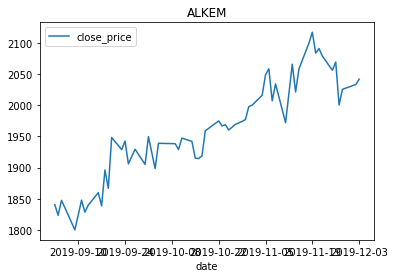

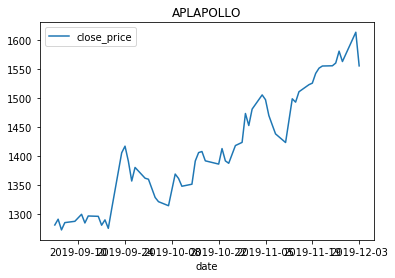

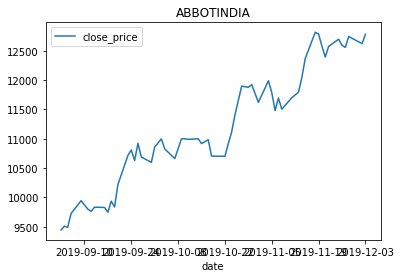

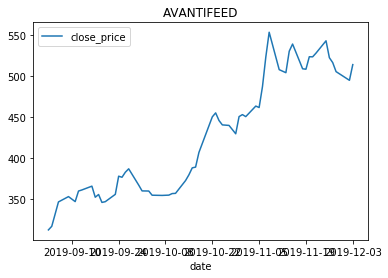

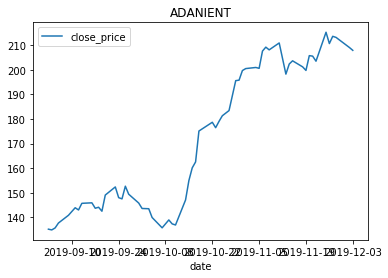

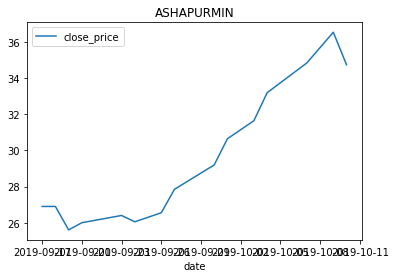

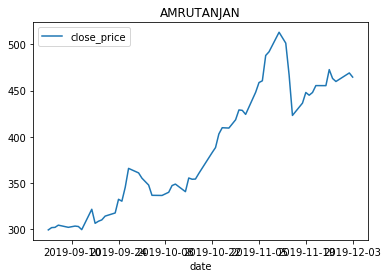

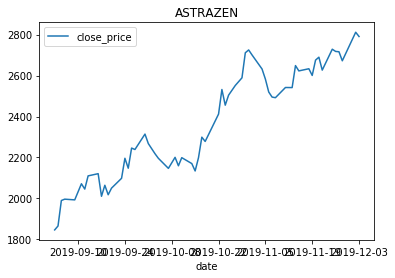

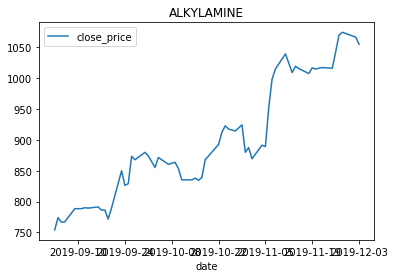

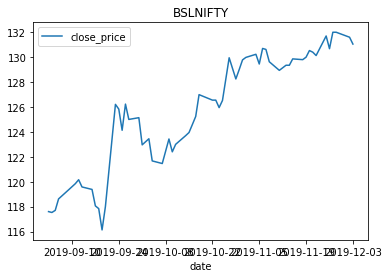

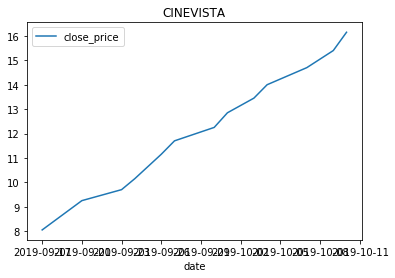

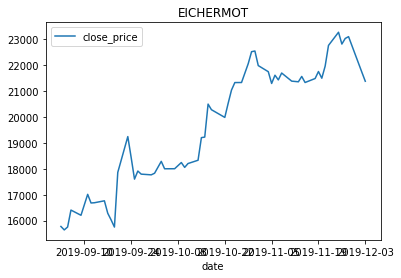

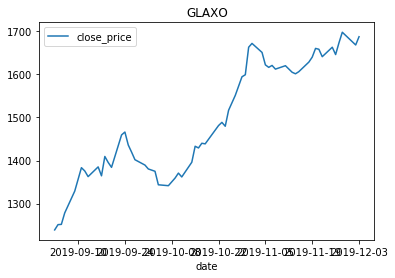

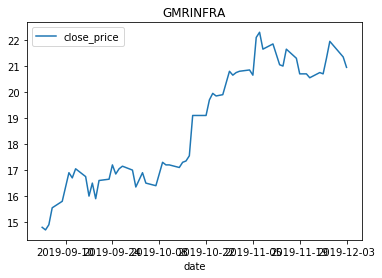

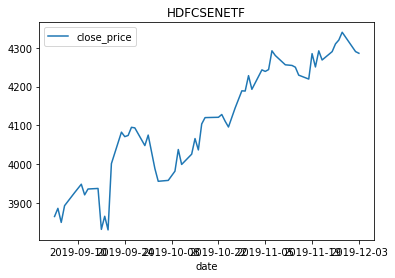

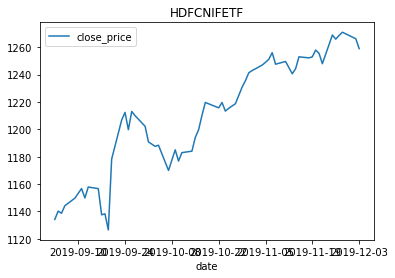

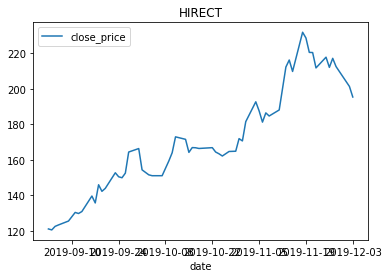

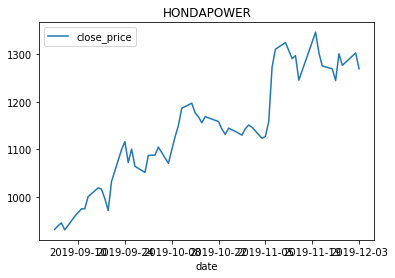

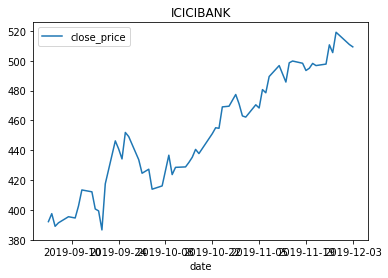

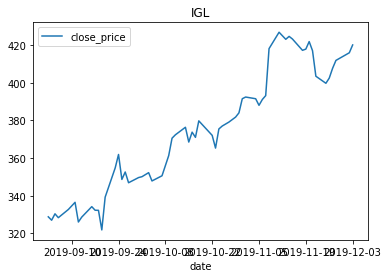

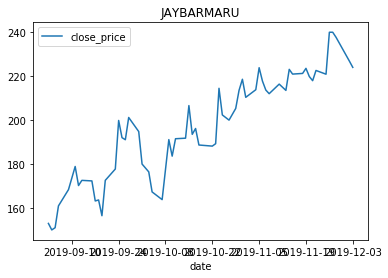

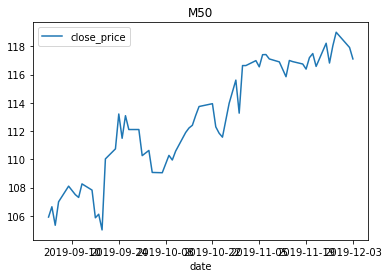

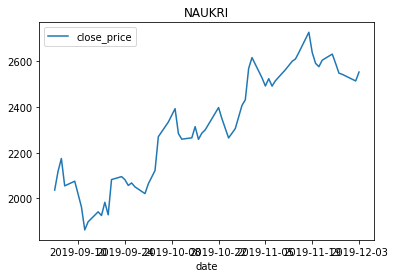

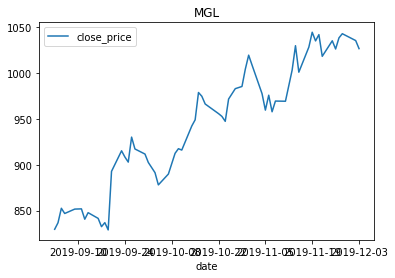

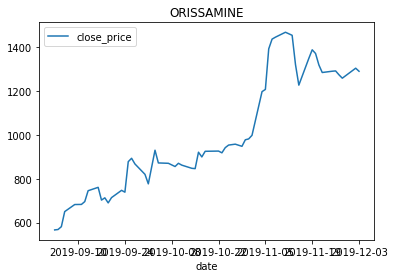

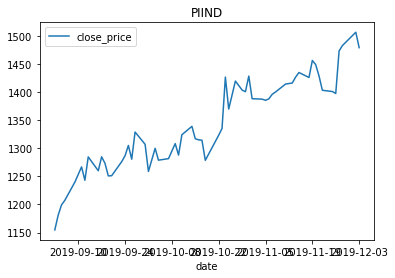

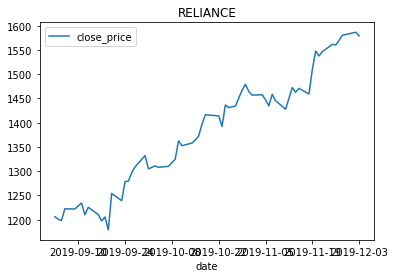

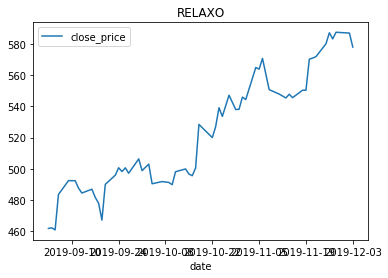

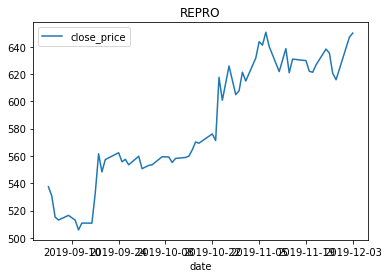

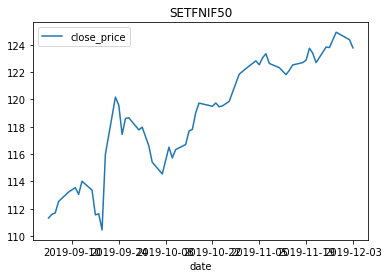

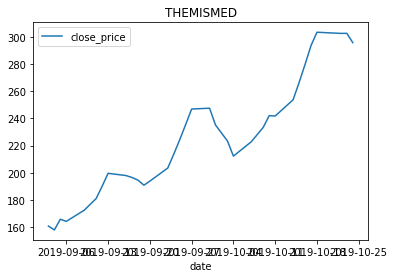

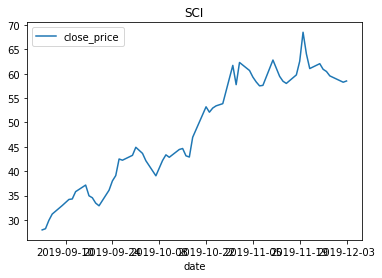

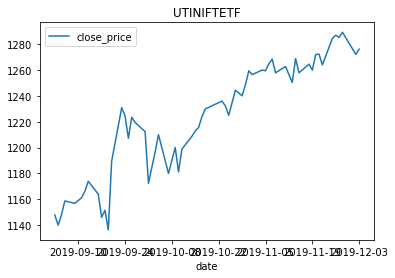

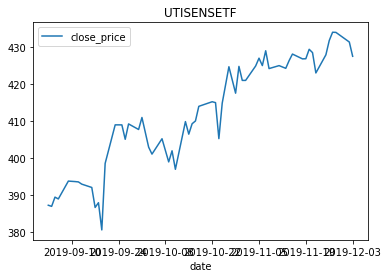

In [15]:
#now we are getting all the symbols from our database
def getAllSymbols(afterdate="2019-10-01"):
    df=pd.read_sql("select distinct(symbol) from stock_data where  series = 'EQ' and date>'"+afterdate+"';",con)
    return df.symbol

symbols= getAllSymbols()

for symbol in  symbols:
    score,slope,intercept,data = analyseTrend(symbol,afterdate="2019-09-01");
    if(score>0.85 and slope>0):
        #print(symbol,score,slope)
        data.plot(x="date",y="close_price",title=symbol)
        plt.show()